# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | The flight was comfortable eno...
1,✅ Trip Verified | We had a really good flying...
2,✅ Trip Verified | Waited an hour to check-in ...
3,Not Verified | Not a great experience at all...
4,✅ Trip Verified | Boarding was difficult caus...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# EDA


In [5]:
df.shape

(1000, 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [7]:
# Remove leading/trailing whitespace and "|" symbols from reviews
df['reviews'] = df['reviews'].str.strip('" ').str.replace('|', '').str.replace('✅ Trip Verified', '').str.replace('Not Verified', '')

# Print the first few rows
print(df.head())

                                             reviews
0     The flight was comfortable enough but with ...
1     We had a really good flying experience with...
2     Waited an hour to check-in at the Paphos bu...
3      Not a great experience at all, from the ou...
4     Boarding was difficult caused by vast major...


In [8]:
# Count the number of reviews
print(f"Total number of reviews: {len(df)}")

# Check for missing values
print(f"Missing values: {df.isnull().sum()}")

# Get the length of each review
df['review_length'] = df['reviews'].str.len()

# Print some statistics about review lengths
print(df['review_length'].describe())

Total number of reviews: 1000
Missing values: reviews    0
dtype: int64
count    1000.000000
mean      816.373000
std       571.135996
min       132.000000
25%       418.000000
50%       660.000000
75%      1028.500000
max      3466.000000
Name: review_length, dtype: float64


In [11]:
df.count

<bound method DataFrame.count of                                                reviews  review_length
0       The flight was comfortable enough but with ...            385
1       We had a really good flying experience with...           1629
2       Waited an hour to check-in at the Paphos bu...            363
3        Not a great experience at all, from the ou...            481
4       Boarding was difficult caused by vast major...            510
..                                                 ...            ...
995     London to Seville. Following on from mistak...            480
996     Doha to Paris via London. This is the first...            741
997     Madrid to London BA0457 on the 18/03. Could...            413
998    On the flight to Tokyo, I was separated from...            279
999     London to Vancouver. Check in agent very he...            541

[1000 rows x 2 columns]>

In [19]:
import re
from collections import Counter

# Define a set of custom stopwords
custom_stopwords = set(['a', 'an', 'the', 'and', 'or', 'but', 'is', 'are', 'was', 'were', 'to', 'in', 'for', 'of', 'at', 'on', 'with', 'by', 'from', 'as', 'it', 'its', 'that', 'this', 'these', 'those', 'which', 'what', 'who', 'whom', 'why', 'how', 'when', 'where', 'if', 'so', 'do', 'does', 'did', 'have', 'has', 'had', 'been', 'be', 'am', 'is', 'are', 'will', 'would', 'should', 'could', 'may', 'might', 'must', 'can', 'cannot', 'shall', 'no', 'not', 'yes', 'you', 'your', 'my', 'our', 'their', 'his', 'her', 'we', 'they', 'him', 'her', 'it', 'me', 'us', 'them', 'i', 'than', 'then', 'there', 'here', 'now', 'also', 'just', 'more', 'some', 'only', 'very', 'even', 'get', 'got', 'go', 'goes', 'went', 'come', 'comes', 'came', 'say', 'says', 'said', 'make', 'makes', 'made', 'take', 'takes', 'took', 'give', 'gives', 'gave', 'see', 'sees', 'saw', 'look', 'looks', 'looked', 'find', 'finds', 'found', 'think', 'thinks', 'thought', 'know', 'knows', 'knew', 'want', 'wants', 'wanted', 'like', 'likes', 'liked', 'need', 'needs', 'needed', 'use', 'uses', 'used', 'put', 'puts', 'put', 'feel', 'feels', 'felt', 'try', 'tries', 'tried', 'ask', 'asks', 'asked', 'call', 'calls', 'called', 'let', 'lets', 'let', 'start', 'starts', 'started', 'keep', 'keeps', 'kept', 'help', 'helps', 'helped', 'turn', 'turns', 'turned', 'run', 'runs', 'ran', 'move', 'moves', 'moved', 'work', 'works', 'worked', 'play', 'plays', 'played', 'show', 'shows', 'showed', 'watch', 'watches', 'watched', 'down', 'up', 'out', 'over', 'under', 'after', 'before', 'between', 'into', 'through', 'against', 'around', 'behind', 'inside', 'outside', 'off', 'on', 'top', 'bottom', 'back', 'front', 'left', 'right', 'side', 'end', 'first', 'last', 'second', 'third', 'next', 'other', 'another', 'something', 'anything', 'everything', 'nothing', 'someone', 'anyone', 'everyone', 'noone', 'somewhere', 'anywhere', 'everywhere', 'nowhere', 'somehow', 'anyhow', 'still', 'yet', 'already', 'never', 'ever', 'always', 'sometimes', 'often', 'usually', 'seldom', 'rarely', 'almost', 'quite', 'too', 'enough', 'many', 'much', 'few', 'little', 'most', 'least', 'all', 'both', 'either', 'neither', 'each', 'every', 'any', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'hundred', 'thousand', 'million', 'billion', 'trillion', 'etc.'])

# Tokenize the reviews using regular expressions
df['tokens'] = df['reviews'].apply(lambda x: re.findall(r'\w+', x.lower()))

# Remove stopwords and punctuation
df['cleaned_tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in custom_stopwords and re.match(r'^[a-zA-Z]+$', word)])

# Create a frequency distribution of words
word_counts = Counter(sum(df['cleaned_tokens'].tolist(), []))

# Print the most common words
print(word_counts.most_common(20))

[('flight', 1932), ('ba', 1259), ('service', 724), ('t', 607), ('london', 537), ('time', 526), ('seat', 460), ('crew', 444), ('class', 443), ('food', 437), ('british', 428), ('good', 425), ('airways', 420), ('business', 412), ('staff', 398), ('seats', 397), ('cabin', 371), ('s', 360), ('check', 358), ('hours', 348)]


In [21]:
!pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 435.7 kB/s eta 0:00:02
   - ------------------------------------- 30.7/626.3 kB 435.7 kB/s eta 0:00:02
   - ------------------------------------- 30.7/626.3 kB 435.7 kB/s eta 0:00:02
   - ------------------------------------- 30.7/626.3 kB 435.7 kB/s eta 0:00:02
   - ------------------------------------- 30.7/626.3 kB 435.7 kB/s eta 0:00:02
   --- ----------------------------------- 61.4/626.3 kB 182.2 kB/s eta 0:00:04
   ----- --------------------------------- 92.2/626.3 kB 249.8 kB/s eta 0:00:03
   ----- --------------------------------- 92.2/626.3 kB 249.8 kB/s eta 0:00:03
   ----- --------------------------------- 92.2/626.3 kB 249.8 kB/s eta 0:00:03
 

In [22]:
from textblob import TextBlob

# Calculate sentiment scores using TextBlob
df['sentiment_scores'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment)

# Extract the polarity scores (sentiment scores)
df['polarity_score'] = df['sentiment_scores'].apply(lambda x: x.polarity)

# Print the average sentiment score
print(f"Average sentiment score: {df['polarity_score'].mean()}")

# Identify the most positive and negative reviews
print("\nMost positive review:")
print(df.loc[df['polarity_score'] == df['polarity_score'].max(), 'reviews'].values[0])

print("\nMost negative review:")
print(df.loc[df['polarity_score'] == df['polarity_score'].min(), 'reviews'].values[0])

Average sentiment score: 0.06714736404634584

Most positive review:
   Gatwick to St Lucia. Great service on this flight. Thank you very much for the cabin and the great cabin crew. Excellent Service.

Most negative review:
   Mykonos to London flight delayed and waiting to depart. They are not on time, be prepared to miss your connections, take off 2 hours late,. The staff is some of the worst I have had on airlines. You may be stuck on the runway and they won’t offer you any water.  The worst business class experience I have had.


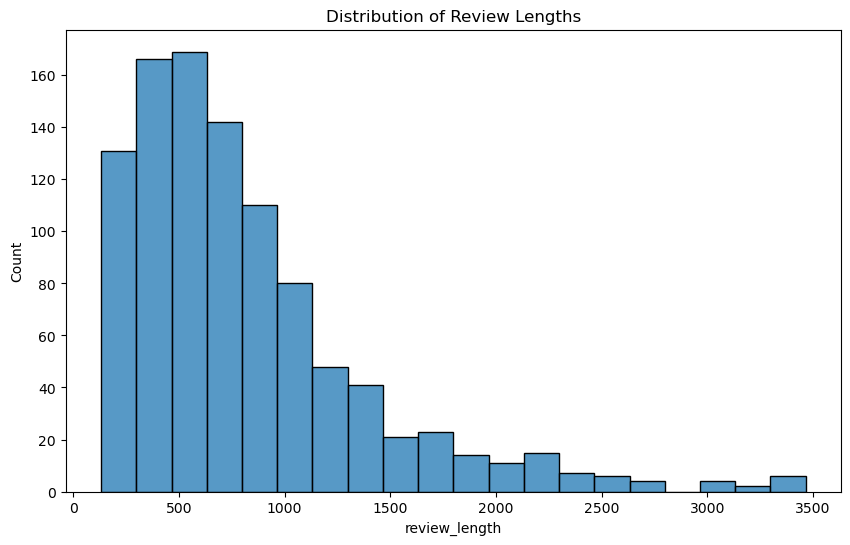

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', bins=20)
plt.title('Distribution of Review Lengths')
plt.show()



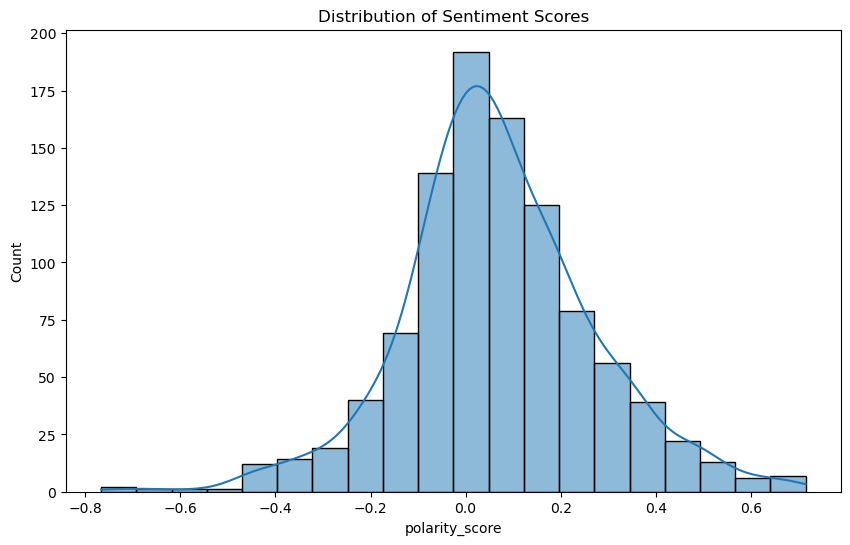

In [31]:
# Plot the sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='polarity_score', bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.show()

In [27]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB 1.3 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/300.2 kB 1.3 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/300.2 kB 1.3 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/300.2 kB 1.3 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/300.2 kB 1.3 MB/s eta 0:00:01
   ----- --------------------------------- 41.0/300.2 kB 109.3 kB/s eta 0:00:03
   ----------- --------------------------- 92.2/300.2 kB 249.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 249.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 249.8 kB/s eta 0:00:01
  

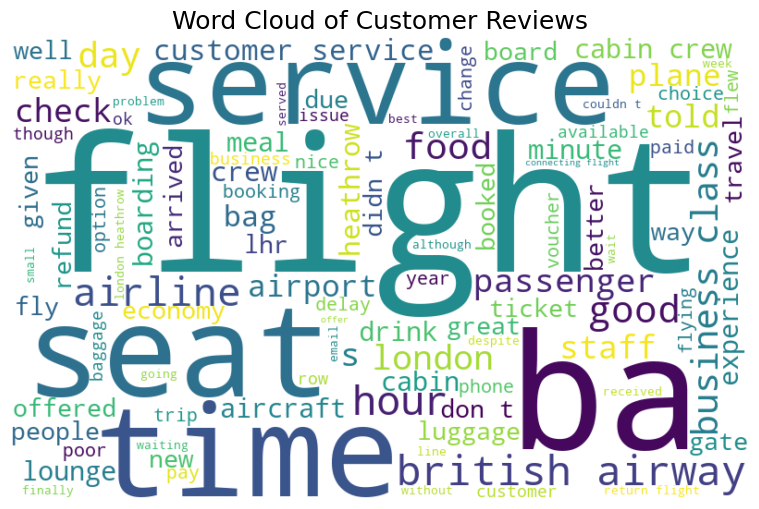

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Join all the cleaned tokens into a single string
text = ' '.join(sum(df['cleaned_tokens'].tolist(), []))

# Create a word cloud object
wordcloud = WordCloud(width=800, height=500, background_color='white', max_words=100).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Reviews', fontsize=18)
plt.show()

### Conclusion

Most reviews tend to be relatively short.
The sentiment of the reviews is generally positive, with a few outliers of negative sentiment.
Overall, customers seem to express satisfaction or positive sentiment towards the subject of the reviews, but there are still some negative sentiments present.